# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курса).

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [2]:
import numpy as np

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [3]:
def max_element(arr):
    
    zeroes = np.where(arr == 0)[0] 
    if zeroes.shape[0] == 0:
        a = None
    else:    
        next_z = zeroes + 1
        if next_z[-1] == arr.shape[0]: #исключаем последний индекс, если он подразумевает последний элемент вектора=0 
            next_z = next_z[:-1]
            if next_z.shape[0] == 0:
                a = None
            else:
                a = max(np.take(arr, list(next_z)))  
    
    return a

In [4]:
max_element(np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]))

5

In [5]:
max_element(np.array([6, 2, 3, 5, 7]))

In [6]:
max_element(np.array([6, 2, 3, 5, 7, 0]))

**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [7]:
def nearest_value(X, v):
    
    i = np.argmin(np.abs(X-v)) #индекс минимальной абсолютной разницы
    
    return np.take(X, i)

In [8]:
nearest_value(np.arange(0,10).reshape((2, 5)), 3.6)

4

In [9]:
X = np.random.randint(10, size=(2, 4))
print(X)
nearest_value(X, 3.6)

[[1 2 9 6]
 [7 8 8 3]]


3

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [10]:
def scale(X):
    
    if np.std(X) == 0:
        X = (X - np.mean(X))
    else:
        X = (X - np.mean(X))/np.std(X)

    return X

In [11]:
X = np.random.randint(10, size=(2, 5))
print(X)
scale(X)

[[5 3 5 5 7]
 [0 7 7 7 2]]


array([[ 0.08638684, -0.77748158,  0.08638684,  0.08638684,  0.95025527],
       [-2.07328422,  0.95025527,  0.95025527,  0.95025527, -1.2094158 ]])

**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [12]:
import pandas as pd

In [13]:
def get_stats(X):
    
    d = np.linalg.det(X)
    t = np.trace(X)
    mn = np.min(X)
    mx = np.max(X)
    F = np.linalg.norm(X, ord='fro')
    E = np.linalg.eigvals(X)
    Inv = np.linalg.inv(X)
    
    print('Matrix', '\n', X) 
    print('')
    print('Eigenvalues', '\n', list(E))
    print('')
    print('Inversed matrix', '\n', Inv)
    
    names = ['determinant', 'trace', 'min', 'max', 'Frobenius norm']
    values = [d, t, mn, mx, F]
    stats = pd.DataFrame([names, values]).T
    stats.columns = ['Name of statistic', 'Value']
    return stats

In [14]:
from numpy import matlib

In [15]:
get_stats(1 * np.matlib.randn((4, 4)) + 10)

Matrix 
 [[ 11.72669655  10.0198391    8.81290939  10.09942866]
 [  8.37632775  10.49977825  11.12339574   9.32276299]
 [ 12.6630603    9.99144759   9.56700881   9.77978189]
 [ 10.51168273  10.73456115   9.13502319   9.18565664]]

Eigenvalues 
 [(40.379076941863431+0j), (0.69646548637608363+1.3996364294226364j), (0.69646548637608363-1.3996364294226364j), (-0.79286765835275486+0j)]

Inversed matrix 
 [[-0.31988398 -0.17445366  0.44463525  0.05536892]
 [-0.27717346 -0.20946216 -0.29440069  0.83077722]
 [-0.4550384   0.27935339  0.4875353  -0.30228721]
 [ 1.14250306  0.16660607 -0.6496268  -0.62474017]]


,Name of statistic,Value
0,determinant,-78.2468
1,trace,40.9791
2,min,8.37633
3,max,12.6631
4,Frobenius norm,40.6145


**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [16]:
max_s = []
for exp_num in range(100):
    A = np.matlib.randn((10, 10))
    B = np.matlib.randn((10, 10))
    C = np.dot(A, B)
    mx = np.max(C)
    max_s.append(mx)
print('Mean = %.2f' %np.mean(max_s))
print('95-percent quantile = %.2f' %np.percentile(max_s, 95))

Mean = 8.61
95-percent quantile = 11.15


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [17]:
import pandas as pd
df = pd.read_csv("2008.csv")
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [18]:
miss_count = df.isnull().sum().sum()
if miss_count == 0:
    print('There are no missed values')
else:
    print('There are %.f missed values' %miss_count)

There are 355215 missed values


In [19]:
miss_obj = np.array(df.isnull().sum(axis=1))
print('%s from %d objects have missed values' %(np.count_nonzero(miss_obj), miss_obj.shape[0]))

70000 from 70000 objects have missed values


In [20]:
miss_feat = np.array(df.isnull().sum())
print('%s from %d features have missed values' %(np.count_nonzero(miss_feat), miss_feat.shape[0]))

16 from 29 features have missed values


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [21]:
miss_target = df['DepDelay'].isnull().sum()
if miss_target == 0:
    print('There are no missed values in the target feature')
else:
    print('There are %.f missed values in the target feature' %miss_target)

There are 1399 missed values in the target feature


Данные с пропущенным таргетом:

In [22]:
miss_df = df[df['DepDelay'].isnull()]
miss_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


Выясним, сколько признаков пропущено по каждому объекту:

In [23]:
miss_df.isnull().sum(axis=1)[:10]

11     14
78     13
103    13
112    13
128    14
194    14
204    13
236    13
257    14
267    14
dtype: int64

In [24]:
sum(miss_df.isnull().sum(axis=1) < 13)

0

По каждому признаку пропущено не менее 13(!) объектов. Какие это признаки?

In [25]:
missed_features = []
for each in miss_df.keys():
    if miss_df[each].isnull().values.all() == True:
        missed_features.append(each)

In [26]:
missed_features

['DepTime',
 'ArrTime',
 'ActualElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'TaxiIn',
 'TaxiOut',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

Глядя на пропущенные признаки, логично предположить, что эти рейсы были отменены. Проверим, так ли это:

In [27]:
miss_df[miss_df['Cancelled'] == 1].shape[0]

1399

In [28]:
df[df['Cancelled'] == 1].shape[0]

1411

In [29]:
1399/1411

0.9914953933380581

Действительно, все 1399 рейсов были отменены. При этом это 99% всех отменённых рейсов. Поэтому признак *Cancelled* и связанные с ним *CancellationCode* и *Diverted* можно удалить.

In [30]:
del df['Cancelled']
del df['CancellationCode']
del df['Diverted']

Исключение объектов с пропущенным и нулевым таргетом:

In [31]:
df = df[(df['DepDelay'].notnull()) & (df['DepDelay'] != 0)]

In [32]:
y = df['DepDelay']
del df['DepDelay']

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [33]:
import math
x = 155
math.modf(x/100)

(0.55, 1.0)

In [34]:
df['DepTime_Hour'] = np.NaN
df['DepTime_Minute'] = np.NaN

df['DepTime_Hour'][df['DepTime'].notnull()] = df['DepTime'].map(lambda x: math.modf(x/100)[1])
df['DepTime_Minute'][df['DepTime'].notnull()] = df['DepTime'].map(lambda x: math.modf(x/100)[0] * 100)

In [35]:
df['ArrTime_Hour'] = np.NaN
df['ArrTime_Minute'] = np.NaN

df['ArrTime_Hour'][df['ArrTime'].notnull()] = df['ArrTime'].map(lambda x: math.modf(x/100)[1])
df['ArrTime_Minute'][df['ArrTime'].notnull()] = df['ArrTime'].map(lambda x: math.modf(x/100)[0] * 100)

In [36]:
df['CRSDepTime_Hour'] = np.NaN
df['CRSDepTime_Minute'] = np.NaN

df['CRSDepTime_Hour'][df['CRSDepTime'].notnull()] = df['CRSDepTime'].map(lambda x: math.modf(x/100)[1])
df['CRSDepTime_Minute'][df['CRSDepTime'].notnull()] = df['CRSDepTime'].map(lambda x: math.modf(x/100)[0] * 100)

In [37]:
df['CRSArrTime_Hour'] = np.NaN
df['CRSArrTime_Minute'] = np.NaN

df['CRSArrTime_Hour'][df['CRSArrTime'].notnull()] = df['CRSArrTime'].map(lambda x: math.modf(x/100)[1])
df['CRSArrTime_Minute'][df['CRSArrTime'].notnull()] = df['CRSArrTime'].map(lambda x: math.modf(x/100)[0] * 100)

In [38]:
del df['DepTime']
del df['ArrTime']
del df['CRSDepTime']
del df['CRSArrTime']

**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [39]:
del df['TailNum']
del df['Year']

Correlation matrix:

In [40]:
pd.concat([df, y], axis=1).corr()['DepDelay'].sort_values(ascending=False)

DepDelay             1.000000
ArrDelay             0.933526
LateAircraftDelay    0.553806
CarrierDelay         0.532696
WeatherDelay         0.238872
DepTime_Hour         0.203125
NASDelay             0.171591
CRSDepTime_Hour      0.140084
CRSArrTime_Hour      0.135561
TaxiOut              0.101294
ArrTime_Hour         0.070181
ActualElapsedTime    0.041946
CRSElapsedTime       0.034302
AirTime              0.025237
Distance             0.024252
CRSDepTime_Minute    0.022437
FlightNum            0.021166
TaxiIn               0.020640
SecurityDelay        0.010668
CRSArrTime_Minute    0.008609
DayofMonth           0.008574
DayOfWeek            0.008530
ArrTime_Minute       0.006171
DepTime_Minute      -0.017055
Month               -0.029528
Name: DepDelay, dtype: float64

Так как DepDelay = *CarrierDelay* + *WeatherDelay* + *NASDelay* + *SecurityDelay* + *LateAircraftDelay*, то прежде всего нам необходимо удалить эти пять признаков. 

Так же мы видим, что *ArrDelay* крайне сильно зависит от задержки вылета, но более того, данного признака нет до вылета самолёта - следовательно, данный признак не может принимать участие в прогнозировании DepDelay. Помимо ArrDelay не могут участвовать в прогнозировании признаки: *ArrTime*, *ActualElapsedTime* (их тоже удаляем).

Стоит также удалить признаки *DepTime*, так как DepDelay = DepTime - CRSDepTime (scheduled departure time).

In [41]:
for_del = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 
           'ArrDelay', 'ArrTime_Hour', 'ArrTime_Minute', 'ActualElapsedTime', 'DepTime_Hour', 'DepTime_Minute']

for feature in for_del:
    del df[feature]

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [42]:
X = df

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

In [44]:
#X['DepTime_Hour'].hist(bins=20) данный признак был удалён, поэтому построим по scheduled departure time

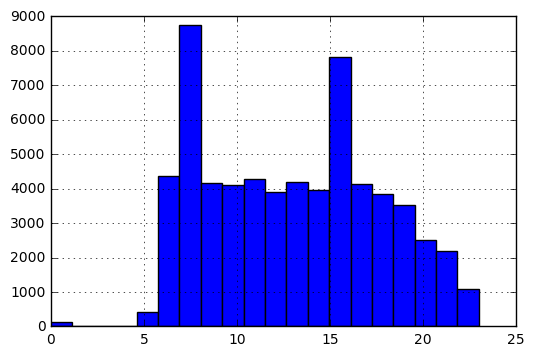

In [45]:
X['CRSDepTime_Hour'].hist(bins=20)

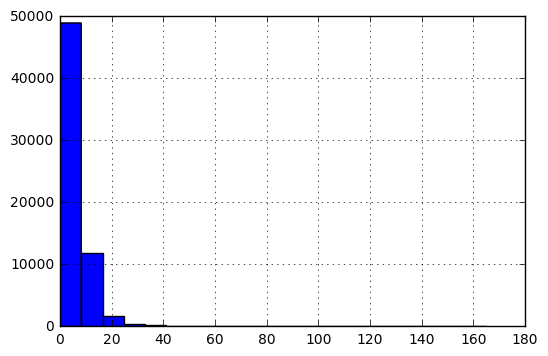

In [46]:
X['TaxiIn'].hist(bins=20)

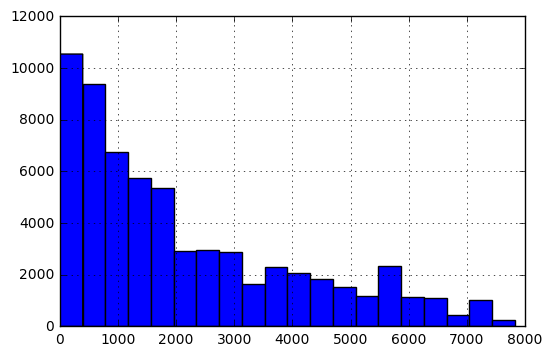

In [47]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

__Ответ__

На данных графиках мы видим, что данные распределены неравномерно и в разных шкалах (до 9, 50 и 12 тысяч), что может отразиться на качестве классификации (один признак будет более значим, чем другой в силу того, что его диапозон значений намного больше).

Масштабирование даёт возможность привести каждый из признаков к единой шкале от 0 до 1, а значит не будет признаков с бОльшим числовым диапозоном, используемых в качестве основного предиктора только в силу данной особенности.

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
def transform_data(data):
    
    cols = data.columns
    num_cols = data._get_numeric_data().columns
    cat_cols = list(set(cols) - set(num_cols))
    num_cols = list(set(num_cols))
    
    for each in cat_cols:
        data[each][data[each].isnull()] = np.NaN
        data = pd.concat([data, pd.get_dummies(df[each], prefix = each)], axis=1, join_axes=[data.index])
        del data[each]
         
    for each in num_cols:
        data[each][data[each].isnull()] = 0

    data_num = data[num_cols]
    scaler = StandardScaler()
    data_num = pd.DataFrame(scaler.fit_transform(data_num), columns=num_cols)
    
    for each in num_cols:
        del data[each]

    data = pd.concat([data_num, data], axis=1, join_axes=[data.index])
    
    return data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [50]:
X = transform_data(X)
X.head()

,Distance,CRSArrTime_Minute,AirTime,FlightNum,TaxiIn,Month,CRSArrTime_Hour,CRSElapsedTime,DayOfWeek,DayofMonth,...,Origin_TXK,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM
0,-0.744130,-1.647149,-0.849307,-0.991600,-0.786908,-0.118281,1.725956,-0.916826,-0.462767,0.256485,...,0,0,0,0,0,0,0,0,0,0
1,0.183961,-0.051159,0.064301,0.106546,-0.582387,-0.118281,0.481702,0.127377,-0.462767,-1.332050,...,0,0,0,0,0,0,0,0,0,0
2,0.471018,-0.507156,0.314806,-0.207284,-0.582387,0.467662,0.066951,0.370547,1.541454,-1.445517,...,0,0,0,0,0,0,0,0,0,0
3,-0.347886,0.347839,-0.363032,0.836931,-0.582387,-1.583137,-0.347800,-0.258835,-0.462767,0.823819,...,0,0,0,0,0,0,0,0,0,0
4,0.634799,-1.647149,0.476898,-0.910960,-0.582387,-0.411252,-0.347800,0.442068,1.541454,-1.332050,...,0,0,0,0,0,0,0,0,0,0


In [51]:
print('There are %.f features' %X.shape[1])

There are 627 features


**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [52]:
df = pd.concat([X, y], axis=1)
df_dropna = df.dropna()
y = df_dropna['DepDelay']
del df_dropna['DepDelay']
X = df_dropna

In [53]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1997)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [54]:
X_train = X_train.sort_index()
y_train = y_train.sort_index()
X_test = X_test.sort_index()
y_test = y_test.sort_index()

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [55]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [56]:
regression.fit(X_train[:1000], y_train[:1000])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
print('R-square on train sample = %.3f' %regression.score(X_train[:1000], y_train[:1000]))
print('R-square on test sample = %.3f' %regression.score(X_test, y_test))

R-square on train sample = 0.351
R-square on test sample = -16374085691559225344.000


In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
print('MSE on train sample = %.3f' %mean_squared_error(y_train[:1000], regression.predict(X_train[:1000])))
print('MSE on test sample = %.3f' %mean_squared_error(y_test, regression.predict(X_test)))

MSE on train sample = 701.050
MSE on test sample = 18764221319130256506880.000


__Вывод__

Модель строит крайне некачественные прогнозы: наблюдается явный эффект переобучения, когда модель "хорошо" работает на обучающей выборке и совсем плохо на других данных.

In [60]:
X.keys()[:14]

Index(['Distance', 'CRSArrTime_Minute', 'AirTime', 'FlightNum', 'TaxiIn',
       'Month', 'CRSArrTime_Hour', 'CRSElapsedTime', 'DayOfWeek', 'DayofMonth',
       'TaxiOut', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'Dest_ABE'],
      dtype='object')

Первые 13 признаков - вещественные, остальные (Dest, Origin и UniqueCarrier) - категориальные (бинарные в новой реализации). Посмотрим, сколько в сумме на себя взяли вещественные в объяснении целевой переменной и три категориальных признака (закодированных в бинарные).

In [61]:
regression.coef_[:13].sum()

2.7141493442152291

In [62]:
regression.coef_.sum()

40913421303553.516

__Вывод__

Видим, что вещественные признаки практически не участвуют в предсказании целевой переменной (основную "массу" задают остальные бинарные признаки, которые задают всего три категориальных). Поэтому можно сделать вывод, что в модели произошел очень-очень сильный эффект переобучения.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [63]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

alphas = np.logspace(-0.1, 0.1, 100)
lasso_cv = LassoCV(alphas=alphas, random_state=0)
k_fold = KFold(n_splits=5)

In [64]:
X_new = X_train[:1000].as_matrix().astype(np.float)
y_new = y_train[:1000].as_matrix().astype(np.float)

In [65]:
for k, (train, test) in enumerate(k_fold.split(X_new, y_new)):
    lasso_cv.fit(X_new[train], y_new[train])
    print("[fold {0}] alpha: {1:.5f}, R-square train: {2:.5f}, R-square test: {3:.5f}, MSE train: {4:.1f}, MSE test: {5:.1f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X_new[train], y_new[train]), lasso_cv.score(X_test, y_test), 
                 mean_squared_error(y_new[train], lasso_cv.predict(X_new[train])), 
                 mean_squared_error(y_test, lasso_cv.predict(X_test))))

[fold 0] alpha: 0.87177, R-square train: 0.01477, R-square test: -0.00169, MSE train: 1176.2, MSE test: 1147.9
[fold 1] alpha: 1.05006, R-square train: 0.00514, R-square test: -0.00146, MSE train: 983.0, MSE test: 1147.6
[fold 2] alpha: 1.25893, R-square train: 0.00233, R-square test: -0.00011, MSE train: 1183.0, MSE test: 1146.1
[fold 3] alpha: 1.25893, R-square train: 0.00688, R-square test: -0.00334, MSE train: 950.3, MSE test: 1149.8
[fold 4] alpha: 1.25893, R-square train: 0.00776, R-square test: -0.00279, MSE train: 1064.2, MSE test: 1149.2


In [66]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=alphas)

In [67]:
for k, (train, test) in enumerate(k_fold.split(X_new, y_new)):
    ridge_cv.fit(X_new[train], y_new[train])
    print("[fold {0}] alpha: {1:.5f}, R-square train: {2:.5f}, R-square test: {3:.5f}, MSE train: {4:.1f}, MSE test: {5:.1f}".
          format(k, ridge_cv.alpha_, ridge_cv.score(X_new[train], y_new[train]), ridge_cv.score(X_test, y_test), 
                 mean_squared_error(y_new[train], ridge_cv.predict(X_new[train])), 
                 mean_squared_error(y_test, ridge_cv.predict(X_test))))

[fold 0] alpha: 1.25893, R-square train: 0.34606, R-square test: -0.18342, MSE train: 780.7, MSE test: 1356.2
[fold 1] alpha: 1.25893, R-square train: 0.34920, R-square test: -0.15051, MSE train: 643.0, MSE test: 1318.5
[fold 2] alpha: 1.25893, R-square train: 0.34583, R-square test: -0.17137, MSE train: 775.7, MSE test: 1342.4
[fold 3] alpha: 1.25893, R-square train: 0.34954, R-square test: -0.15696, MSE train: 622.4, MSE test: 1325.8
[fold 4] alpha: 1.25893, R-square train: 0.33542, R-square test: -0.17798, MSE train: 712.8, MSE test: 1349.9


__Вывод__:

Безусловно, р-квадрат после регуляризации стал выглядеть приличнее. Но с заданными параметрами, не удалось его сделать положительным, что всё-таки говорит о плохом качестве модели.

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [68]:
X_train['one'] = 1
X_test['one'] = 1

X_train.insert(loc=0, column='One', value=X_train['one'])
del X_train['one']

X_test.insert(loc=0, column='One', value=X_test['one'])
del X_test['one']

In [69]:
X_test.shape

(17230, 628)

**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [70]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    
    w_t = w.transpose()
    y_pred = X.dot(w)
    
    return y_pred

Функция потерь

$Q(w) =(Xw-y)^T (Xw-y) = ((Xw)^T-y^T) (Xw-y)= (Xw)^T Xw - y^T Xw - (Xw)^T y + y^T y = w^T X^T X w - y^T Xw - w^T X^T y+ y^T y$

Зная, что $y^T Xw=(y^T Xw)^T = w^T X^T y$, имеем:

$Q(w) = w^T X^T X w - 2 y^T X w+ y^T y$

In [71]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    
    y = y.reshape(y.shape[0], 1)
    X_t = X.transpose()
    w_t = w.transpose()
    y_t = y.transpose()
    MSPE = w_t.dot((np.dot(X_t, X)).dot(w)) - 2 * y_t.dot(X.dot(w)) + y_t.dot(y)
    
    return MSPE

Градиент квадратичной функции потерь:

$\frac{\partial Q(w)}{\partial w} = 2 X^T X w - 2 (y^T X)^T = 2 X^T X w - 2 X^T y$

In [72]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    
    X_t = X.transpose()
    a = (np.dot(X_t, X)).dot(w)
    b = (X_t).dot(y.reshape(y.shape[0], 1))
    grad = np.subtract(2 * a, 2 * b)
    
    return grad

$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2$

In [73]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    
    A = (y.reshape(y.shape[0], 1) - make_pred(X, w).as_matrix())/y.reshape(y.shape[0], 1)
    A_t = A.transpose()
    w_t = w.transpose()
    MSPE = np.dot(A_t, A)/y.shape[0] + np.dot(w_t, w) 
    
    return float(MSPE)

In [74]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    
    X_t = X.transpose()
    a = np.dot(X_t, (y.reshape(y.shape[0], 1) - make_pred(X, w).as_matrix())/(y.reshape(y.shape[0], 1) ** 2))
    grad = -2 * a/y.shape[0] + 2 * w
    
    return grad

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [75]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg=False):
    
    converged = False
    w = w0
    
    if is_reg==False:
        w_list, q_list = [w0], [get_func(w0, X, y)]
        i = 0
        while not converged:
            w0 = w
            direction = -get_grad(w, X, y)
            w = w0 + step_size * direction
            w_list.append(w)
            q_list.append(get_func(w, X, y))
            if i > 0 and np.linalg.norm(w - w0) < eps:
                print('Converged')
                print('Number of Iterations:', i)
                converged = True
            else:
                coverged = False
                i += 1

            if i == max_iter:
                print('Maximum Iterations Exceeded')
                converged = True
                
    else:
        w_list, q_list = [w0], [get_reg_func(w0, X, y)]
        i = 0
        while not converged:
            w0 = w
            direction = -get_reg_grad(w, X, y)
            w = w0 + step_size * direction
            w_list.append(w)
            q_list.append(get_reg_func(w, X, y))
            if i > 0 and np.linalg.norm(w - w0) < eps:
                print('Converged')
                print('Number of Iterations:', i)
                converged = True
            else:
                coverged = False
                i += 1

            if i == max_iter:
                print('Maximum Iterations Exceeded')
                converged = True
            
    return w, q_list

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [76]:
X_train.shape

(40203, 628)

### MSPE без регуляризации
__Случайные веса__

In [77]:
w0 = np.random.rand(628,1)

In [78]:
w_10, q_10 = grad_descent(X_train[:300], y_train[:300], w0, 10, 1000, 0.001, False)

Maximum Iterations Exceeded


In [79]:
w_1, q_1 = grad_descent(X_train[:300], y_train[:300], w0, 1, 1000, 0.001, False)

Maximum Iterations Exceeded


In [80]:
w_001, q_001 = grad_descent(X_train[:300], y_train[:300], w0, 0.001, 1000, 0.001, False)

Maximum Iterations Exceeded


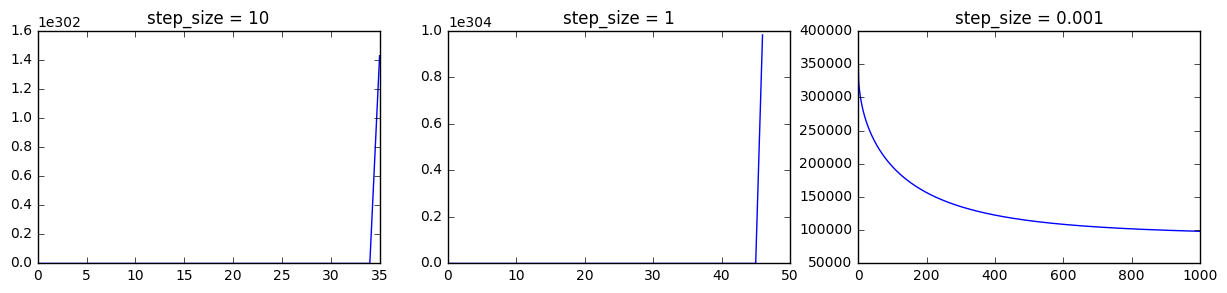

In [81]:
f, axarr = plt.subplots(1, 3, figsize=(15,3))

axarr[0].plot(np.arange(1001), q_10)
axarr[0].set_title('step_size = 10')
axarr[1].plot(np.arange(1001), q_1)
axarr[1].set_title('step_size = 1')
axarr[2].plot(np.arange(1001), q_001)
axarr[2].set_title('step_size = 0.001')

plt.show()

__Нулевые веса__

In [82]:
w0 = np.zeros((628,1))

In [83]:
w_10, q_10 = grad_descent(X_train[:300], y_train[:300], w0, 10, 1000, 0.001, False)

Maximum Iterations Exceeded


In [84]:
w_1, q_1 = grad_descent(X_train[:300], y_train[:300], w0, 1, 1000, 0.001, False)

Maximum Iterations Exceeded


In [85]:
w_001, q_001 = grad_descent(X_train[:300], y_train[:300], w0, 0.001, 1000, 0.001, False)

Maximum Iterations Exceeded


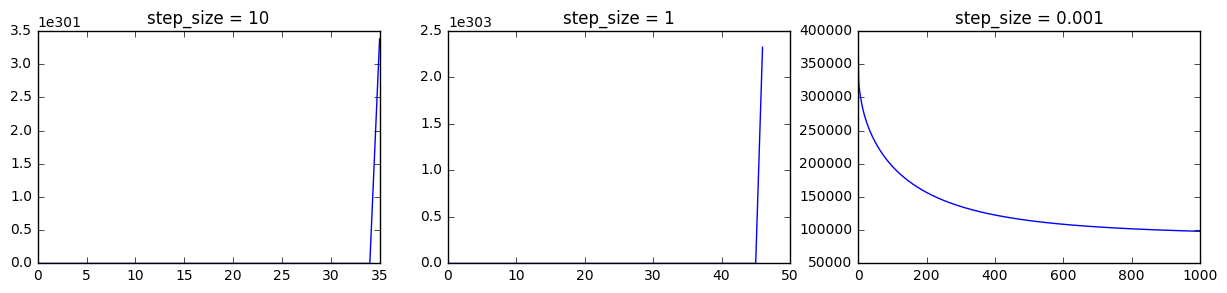

In [86]:
f, axarr = plt.subplots(1, 3, figsize=(15,3))

axarr[0].plot(np.arange(1001), q_10)
axarr[0].set_title('step_size = 10')
axarr[1].plot(np.arange(1001), q_1)
axarr[1].set_title('step_size = 1')
axarr[2].plot(np.arange(1001), q_001)
axarr[2].set_title('step_size = 0.001')

plt.show()

### MSPE с регуляризацией
__Случайные веса__

In [87]:
w0 = np.random.rand(628,1)

In [88]:
w_10, q_10 = grad_descent(X_train[:300], y_train[:300], w0, 10, 1000, 0.001, True)

Maximum Iterations Exceeded


In [89]:
w_1, q_1 = grad_descent(X_train[:300], y_train[:300], w0, 1, 1000, 0.001, True)

Maximum Iterations Exceeded


In [90]:
w_001, q_001 = grad_descent(X_train[:300], y_train[:300], w0, 0.001, 1000, 0.001, True)

Maximum Iterations Exceeded


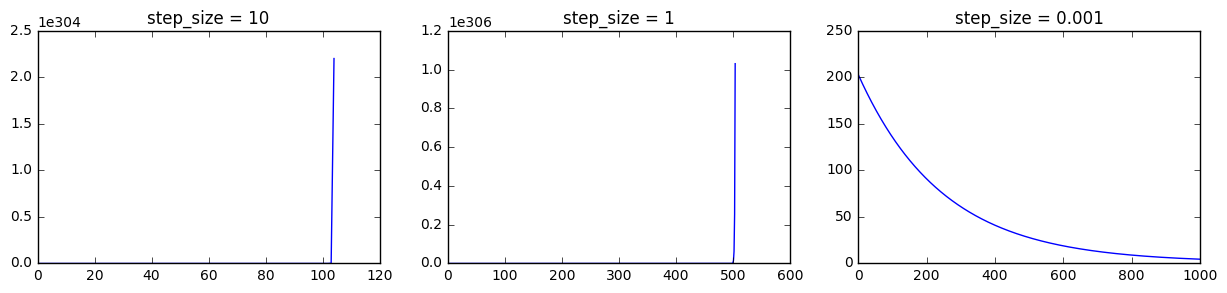

In [91]:
f, axarr = plt.subplots(1, 3, figsize=(15,3))

axarr[0].plot(np.arange(1001), q_10)
axarr[0].set_title('step_size = 10')
axarr[1].plot(np.arange(1001), q_1)
axarr[1].set_title('step_size = 1')
axarr[2].plot(np.arange(1001), q_001)
axarr[2].set_title('step_size = 0.001')

plt.show()

__Нулевые веса__

In [92]:
w0 = np.zeros((628,1))

In [93]:
w_10, q_10 = grad_descent(X_train[:300], y_train[:300], w0, 10, 1000, 0.001, True)

Maximum Iterations Exceeded


In [94]:
w_1, q_1 = grad_descent(X_train[:300], y_train[:300], w0, 1, 1000, 0.001, True)

Maximum Iterations Exceeded


In [95]:
w_001, q_001 = grad_descent(X_train[:300], y_train[:300], w0, 0.001, 1000, 0.001, True)

Converged
Number of Iterations: 1


In [96]:
q_001

[1.0, 0.9999091728384671, 0.9998187808278975]

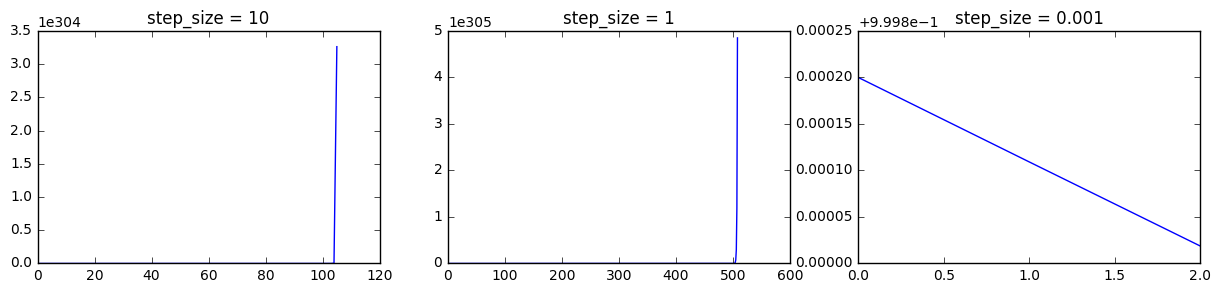

In [97]:
f, axarr = plt.subplots(1, 3, figsize=(15,3))

axarr[0].plot(np.arange(1001), q_10)
axarr[0].set_title('step_size = 10')
axarr[1].plot(np.arange(1001), q_1)
axarr[1].set_title('step_size = 1')
axarr[2].plot(np.arange(3), q_001)
axarr[2].set_title('step_size = 0.001')

plt.show()

__Вывод__

В данном случае, параметры не особо влияют на итоговый результат минимизации и скорость сходимости (во всех кроме одного случая не было найдено минимального значения).

Единственный случай, при котором было найдено решение - изначально заданные нулевые веса, MSPE с регуляризацией и шаг 0.001. Хотя начинать с нулевых весов - "опасно", так как мы можем оказаться в седловой точке, в данном случае такого не случилось и на второй итерации было найдено решение.

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

***Часть предыдущего номера выглядит следующим образом:***

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?


***Так как я не смогла понять различий в заданиях, я решила просто вывести предсказания для тестовой выборки и функционал на данной выборке.***

In [98]:
y_pred = make_pred(X_test, w_001)

In [99]:
get_reg_func(w_001, X_test, y_test)

0.9998778982114378

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [101]:
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2$

In [102]:
y_pred = regression.predict(X_test)

In [103]:
A = (y_test - y_pred)/y_test
A_t = A.transpose()
MSPE = float(np.dot(A_t, A)/y_test.shape[0])
MSPE

30.552103490995624

В пункте 17 решение было найдено лучше. Это может объясняться, прежде всего, введением регуляризации (а так же тем, что регрессионная модель была изначально не очень хорошей).